In [1]:
import pandas as pd

import matplotlib.pyplot as plt

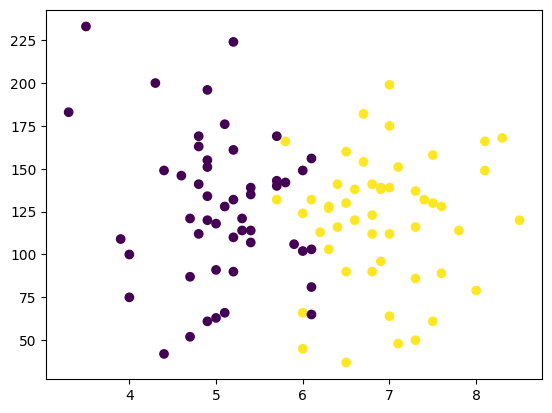

In [2]:
df=pd.read_csv(r"C:\Users\sandi\.arduinoIDE\logs\20250321T222607\host\placement.csv")
df=df.iloc[:,1:]
df.head()
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

plt.show()

In [3]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [49]:
import sklearn 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train
x_test


,cgpa,iq
69,8.5,120.0
11,6.9,138.0
67,5.0,118.0
52,7.0,175.0
68,4.0,75.0
59,4.8,112.0
28,5.2,90.0
22,4.9,120.0
72,7.3,116.0
93,6.8,112.0


In [26]:
y_train
y_test

25    0
52    1
54    1
2     0
77    1
50    0
93    1
8     0
21    1
58    1
Name: placement, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [45]:
x_train=scalar.fit_transform(x_train)
x_train

array([[ 0.39084609, -0.17630717],
       [-2.37682039,  1.56939435],
       [ 0.56940522, -0.07208618],
       [-0.76978824, -1.4790695 ],
       [-0.68050867, -0.33263865],
       [ 1.19436216,  0.37085301],
       [-0.14483129,  0.50112924],
       [ 1.64075998, -0.22841766],
       [-0.68050867,  0.99617893],
       [ 0.65868478,  1.5433391 ],
       [-1.39474518,  0.68351597],
       [ 0.1230074 , -1.50512474],
       [ 2.0871578 ,  1.17856565],
       [-0.59122911, -0.22841766],
       [ 0.65868478,  0.8137922 ],
       [ 0.03372784, -2.02622967],
       [ 0.92652347, -1.53117999],
       [ 0.92652347,  0.4229635 ],
       [ 0.74796435,  0.00607956],
       [-0.94834737,  0.29268727],
       [-0.50194955,  0.4229635 ],
       [ 0.56940522,  0.39690826],
       [-0.50194955, -0.22841766],
       [ 0.1230074 , -1.0882408 ],
       [-1.12690649, -0.93190932],
       [ 0.30156653,  0.13635579],
       [-1.75186344, -1.24457228],
       [ 1.37292129,  0.91801319],
       [ 0.92652347,

In [28]:
x_test=scalar.transform(x_test)
x_test

array([[  5. ,  91. ],
       [  7. , 175. ],
       [  6.4, 141. ],
       [  5.3, 121. ],
       [  7.3,  50. ],
       [  3.5, 233. ],
       [  6.8, 112. ],
       [  6.1, 156. ],
       [  7.1, 151. ],
       [  8. ,  79. ]])

In [30]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [32]:
## model training
clf.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
## evalute the model
y_predict=clf.predict(x_test)
y_predict

c:\Users\sandi\OneDrive\Desktop\pandas\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [38]:
y_test

25    0
52    1
54    1
2     0
77    1
50    0
93    1
8     0
21    1
58    1
Name: placement, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)
print(x_train.shape)


(90, 2)


c:\Users\sandi\OneDrive\Desktop\pandas\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

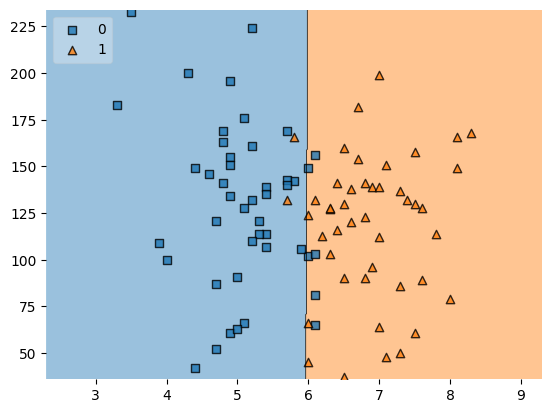

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train.values, y_train.values, clf=clf,legend=2)


In [53]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))